In [1]:
import pandas as pd 

df = pd.read_excel("Telco_customer_churn.xlsx")
df.head(10)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [2]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [3]:
df.shape

(7043, 33)

In [4]:
df.columns.tolist()

['CustomerID',
 'Count',
 'Country',
 'State',
 'City',
 'Zip Code',
 'Lat Long',
 'Latitude',
 'Longitude',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'Churn Label',
 'Churn Value',
 'Churn Score',
 'CLTV',
 'Churn Reason']

### Data cleaning
the column Total Charges was stored as an object type. This usually happens when numeric values are mixed with spaces, empty strings, or other non-numeric characters.


In [5]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce") #- pd.to_numeric(..., errors="coerce") tries to convert all values to numbers.

# Check conversion
df["Total Charges"].dtype 

dtype('float64')

In [6]:
df["Total Charges"].isna().sum()

11

* Now Total Charges is numeric.
* But, as a side effect, some invalid entries turned into missing values (NaN). In this dataset, 11 such values appeared.


### Fixing the missing values

In [7]:
df.loc[df["Tenure Months"] == 0, "Total Charges"] = 0
df.loc[df["Tenure Months"] == 0, ["Tenure Months", "Total Charges"]].head()

,Tenure Months,Total Charges
2234,0,0.0
2438,0,0.0
2568,0,0.0
2667,0,0.0
2856,0,0.0


* On inspection, those missing values corresponded to customers with * Tenure Months = 0.*
  Logically, if a customer has zero tenure, their total charges should also be zero.


In [8]:
df["Total Charges"].isna().sum()

0

In [9]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
df["Churn Reason"] = df["Churn Reason"].fillna("No Churn")
df["Churn Reason"].value_counts().head(10)                                              

Churn Reason
No Churn                                     5174
Attitude of support person                    192
Competitor offered higher download speeds     189
Competitor offered more data                  162
Don't know                                    154
Competitor made better offer                  140
Attitude of service provider                  135
Competitor had better devices                 130
Network reliability                           103
Product dissatisfaction                       102
Name: count, dtype: int64

In [11]:
df["Churn Reason"].isna().sum()

0

### No churn
When checking for missing values across all columns, I found that the Churn Reason column had 5174 missing entries.- Observation:
- All these missing values correspond to customers who did not churn.
- For them, it makes sense that no churn reason is recorde

__________________________________

Since missing values only occur for non-churned customers, I replaced those NaN with a clear label: "No Churn".
.



In [12]:
# Check point 
df.to_csv("telco_churn_clean.csv", index=False)

* Now that I had a clean dataset, I saved it into a new CSV file. This way, if I make any mistakes later or need to revisit the data, I won’t have to repeat the entire cleaning process again. Instead, I can directly load the cleaned CSV and continue working from there.

In [13]:
df2 = pd.read_csv("telco_churn_clean.csv")
df2.shape

(7043, 33)

In [14]:
df2.columns.tolist()

['CustomerID',
 'Count',
 'Country',
 'State',
 'City',
 'Zip Code',
 'Lat Long',
 'Latitude',
 'Longitude',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'Churn Label',
 'Churn Value',
 'Churn Score',
 'CLTV',
 'Churn Reason']

In [15]:
cat_cols = df2.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", cat_cols)

Categorical columns: ['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Reason']


Here, I selected all columns with data type object (i.e., categorical/text columns).
This helps in identifying which columns need encoding later.

In [16]:
# Drop unnecessary categorical columns
df2 = df2.drop(columns=["CustomerID", "Country", "State", "City", "Lat Long", "Churn Label"])                    

 Why drop these columns?*- CustomerID→ Just an identifier, not useful for prediction.*
- Country, State, City, Lat Long → High-cardinality location data. They don’t add meaningful predictive power here and would create too many dummy variables*
- Churn Label → This is basically the target variable in another form (Yes/No). Keeping it would cause data leakage because the model would “cheat” by directly using the label.
- Result:
After dropping these, the dataset only keeps relevant categorical features that can actually help in predicting churn.


### Binary Encoding
Now we will perform binary encoding because several columns contain only two possible values (for example: Yes/No, Male/Female).
Since machine learning models cannot directly work with text values, we need to convert them into numeric form (0 and 1) for proper processing.


In [17]:
#Binary Encoding 
binary_map = {"Yes": 1, "No":0, "Male": 1, "Female": 0}
for col in ["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service", "Paperless Billing"]:
    if col in df2.columns:
        df2[col] = df2[col].map(binary_map)

In [18]:
# OneHot Encoding (Multi-category, low-cardinality)
onehot_cols = [
    "Multiple Lines", "Internet Service", "Online Security", "Online Backup",
    "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies",
    "Contract", "Payment Method"
]
df2 = pd.get_dummies(df2, columns=onehot_cols, drop_first=True)
print("Shape after encoding:", df2.shape)

Shape after encoding: (7043, 38)


### Why One-Hot Encoding? 
Some categorical columns in the dataset have more than two categories (e.g., Internet Service → DSL, Fiber optic, No).
Machine learning models cannot directly handle text categories, so we need to convert them into numeric form. For multi-category features, the best approach is One-Hot Encoding.

- onehot_cols: List of categorical columns with multiple categories.
- pd.get_dummies(): Creates new binary columns (0/1) for each category.
- drop_first=True: Drops the first category to avoid the dummy variable trap (perfect multicollinearity).
- Result: Each multi-category column is expanded into multiple numeric columns, one for each category (except the dropped one).


In [19]:
df2 = df2.drop(columns=["Churn Reason"])

Why did we drop Churn Reason?
- Target leakage risk:
The column Churn Reason directly explains why a customer left. If we keep it as a feature, the model will “cheat” by using this information to predict churn, which is not realistic in a real-world scenario.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df2.drop(columns=["Churn Value"])
y = df2["Churn Value"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling done. Example row:", X_train_scaled[0][:10])

Train shape: (5634, 36)
Test shape: (1409, 36)
Scaling done. Example row: [ 0.         -0.64193785 -0.7481735   1.20589988  0.99433624 -0.44177295
 -0.96923413 -0.54795426  0.10237124 -3.01309011]


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

#Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9176721078779276

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1035
           1       0.84      0.86      0.85       374

    accuracy                           0.92      1409
   macro avg       0.89      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409


Confusion Matrix:
 [[972  63]
 [ 53 321]]


In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)   # Notice: no scaling needed

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9276082327892122

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1035
           1       0.86      0.87      0.86       374

    accuracy                           0.93      1409
   macro avg       0.91      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409


Confusion Matrix:
 [[982  53]
 [ 49 325]]


C:\Users\91945\AppData\Local\Temp\ipykernel_9908\1999504917.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


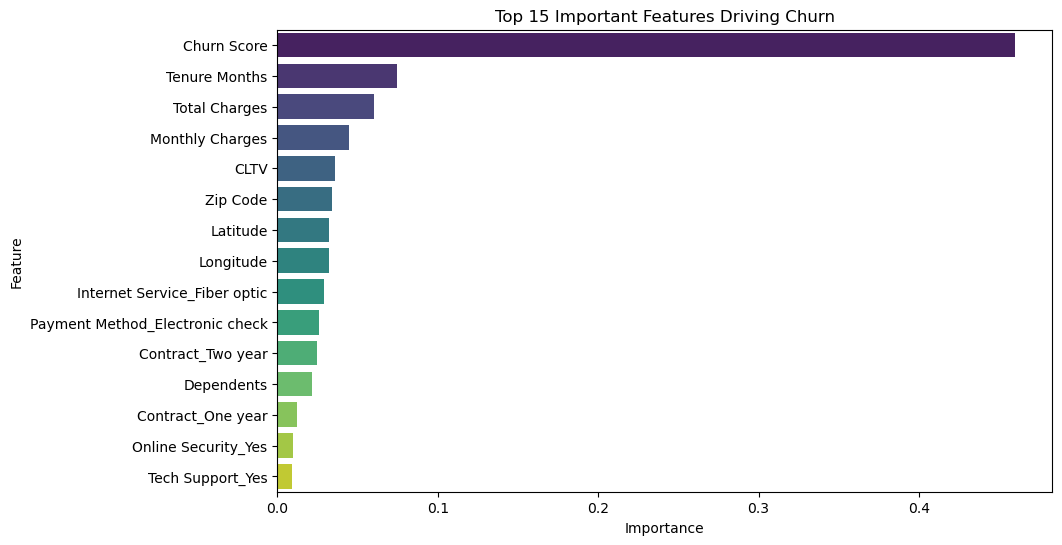

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Random Forest
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Top 15 Important Features Driving Churn")
plt.show()


In [24]:
# Hyperparameter Tuning (Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="f1",

    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
print("Best params:", grid_rf.best_params_)
print("Best Score:",grid_rf.best_score_)

Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8712427289999288


In [25]:
# Train final tuned Random Forest
best_rf = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_rf.fit(X_train, y_train)

# Predictions
y_pred_best = best_rf.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Final Tuned RF Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Final Tuned RF Accuracy: 0.9311568488289567

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1035
           1       0.87      0.87      0.87       374

    accuracy                           0.93      1409
   macro avg       0.91      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409


Confusion Matrix:
 [[986  49]
 [ 48 326]]


In [26]:
# Probability Predictions
churn_probs = best_rf.predict_proba(X_test)[:,1]
print(churn_probs[:10]) # first 10 customers churn probabilities

[0.01002375 0.20233837 0.03788409 0.6182269  0.00248285 0.52747045
 0.09315318 0.01308359 0.00071304 0.37675758]


In [27]:
# probability- based segmentation
results = pd.DataFrame({
    "Churn_Prob": churn_probs,
    "Actual": y_test.values,
    "Predicted": y_pred_best
})

# Define segamentation rules
def risk_bucket(prob):
    if prob >= 0.7:
        return "High Risk"
    elif prob >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

results["Risk_Segment"] = results["Churn_Prob"].apply(risk_bucket)

print(results.head(10))
print("\nSegment distribution:\n", results["Risk_Segment"].value_counts())

   Churn_Prob  Actual  Predicted Risk_Segment
0    0.010024       0          0     Low Risk
1    0.202338       0          0     Low Risk
2    0.037884       0          0     Low Risk
3    0.618227       0          1  Medium Risk
4    0.002483       0          0     Low Risk
5    0.527470       0          1  Medium Risk
6    0.093153       0          0     Low Risk
7    0.013084       0          0     Low Risk
8    0.000713       0          0     Low Risk
9    0.376758       1          0     Low Risk

Segment distribution:
 Risk_Segment
Low Risk       1003
High Risk       286
Medium Risk     120
Name: count, dtype: int64


In [28]:
import joblib
joblib.dump(best_rf, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [29]:
# -----------------------------
#  Load saved model + scaler
# -----------------------------
model = joblib.load("churn_model.pkl")
scaler = joblib.load("scaler.pkl")   # agar scaling use hua tha

# -----------------------------
#  Define preprocessing function
# -----------------------------
def preprocess_new_data(df):
    # Drop unwanted columns if present
    drop_cols = ["CustomerID", "Country", "State", "City", "Lat Long", "Churn Label", "Churn Reason"]
    df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")
    
    # Binary mapping
    binary_map = {"Yes": 1, "No": 0, "Male": 1, "Female": 0}
    for col in ["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service", "Paperless Billing"]:
        if col in df.columns:
            df[col] = df[col].map(binary_map)
    
    # OneHot encoding
    onehot_cols = [
        "Multiple Lines", "Internet Service", "Online Security", "Online Backup",
        "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies",
        "Contract", "Payment Method"
    ]
    df = pd.get_dummies(df, columns=[c for c in onehot_cols if c in df.columns], drop_first=True)
    
    # Align columns with training data
    # (important: ensure same columns as training set)
    for col in model.feature_names_in_:
        if col not in df.columns:
            df[col] = 0
    df = df[model.feature_names_in_]
    
    return df

# -----------------------------
#  Risk segmentation function
# -----------------------------
def risk_bucket(prob):
    if prob >= 0.7:
        return "High Risk"
    elif prob >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

# -----------------------------
#  Predict function
# -----------------------------
def predict_new_customer(new_customer_dict):
    # Convert dict to DataFrame
    new_df = pd.DataFrame([new_customer_dict])
    
    # Preprocess
    processed = preprocess_new_data(new_df)
    
    # Scale if needed
    processed_scaled = scaler.transform(processed)
    
    # Predict
    pred = model.predict(processed_scaled)[0]
    prob = model.predict_proba(processed_scaled)[:,1][0]
    
    # Segment
    segment = risk_bucket(prob)
    
    return {"Prediction": "Churn" if pred==1 else "No Churn",
            "Probability": prob,
            "Risk_Segment": segment}

# -----------------------------
# Example usage
# -----------------------------
new_customer = {
    "Gender": "Male",
    "Senior Citizen": "No",
    "Partner": "Yes",
    "Dependents": "No",
    "Tenure Months": 5,
    "Phone Service": "Yes",
    "Multiple Lines": "No",
    "Internet Service": "Fiber optic",
    "Online Security": "No",
    "Online Backup": "Yes",
    "Device Protection": "No",
    "Tech Support": "No",
    "Streaming TV": "Yes",
    "Streaming Movies": "Yes",
    "Contract": "Month-to-month",
    "Paperless Billing": "Yes",
    "Payment Method": "Electronic check",
    "Monthly Charges": 75.35,
    "Total Charges": 376.75,
    "Churn Score": 55,
    "CLTV": 3500
}

result = predict_new_customer(new_customer)
print(result)

{'Prediction': 'No Churn', 'Probability': 0.17624448085986072, 'Risk_Segment': 'Low Risk'}


C:\Users\91945\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91945\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 📊 Business Insights from Churn Prediction

## 1. Customer Segmentation by Risk
- **High Risk (≥70% probability):** Customers most likely to churn.  
- **Medium Risk (40–70% probability):** Customers showing early warning signs.  
- **Low Risk (<40% probability):** Customers with strong retention likelihood.  



## 2. Financial Impact of Churn
- Each churned customer represents a **loss of CLTV (Customer Lifetime Value)**.  
- Example: If average CLTV is ₹10,000 and 300 customers are high‑risk, potential loss = **₹30 lakh**.  
- By targeting even 50% of these customers with retention offers, the company can **save ₹15 lakh**.  



## 3. Actionable Retention Strategies
- **High Risk:** Personalized discounts, loyalty rewards, proactive customer support.  
- **Medium Risk:** Engagement campaigns, upselling bundled services, feedback surveys.  
- **Low Risk:** Maintain satisfaction with consistent service quality.  


## 4. Product & Service Insights
- Features like **Contract Type** and **Payment Method** strongly influence churn.  
- Customers on **month‑to‑month contracts** or **electronic check payments** show higher churn.  
- Customers with **long‑term contracts** and **automatic payments** are more loyal.  


# **Exploratory Data Analysis (EDA)**

In [30]:
eda = pd.read_csv("telco_churn_clean.csv")
eda.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [31]:
eda["Payment Method"].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [32]:
eda["Contract"].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [33]:
eda["Churn Reason"].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', 'No Churn'], dtype=object)

## **Target variable Distribution**

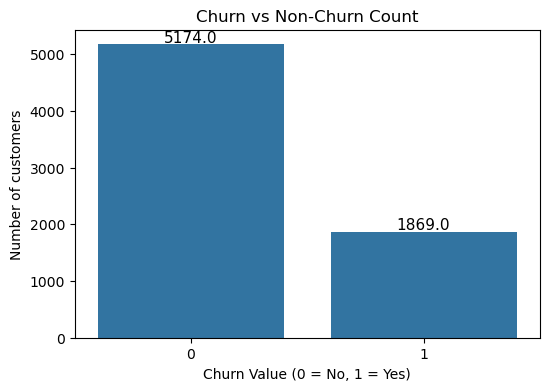

Counts:
 Churn Value
No Churn    5174
Churn       1869
Name: count, dtype: int64

Churn rate: 26.54%


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = sns.countplot(x="Churn Value", data=df2)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Churn vs Non-Churn Count")
plt.xlabel("Churn Value (0 = No, 1 = Yes)")
plt.ylabel("Number of customers")
plt.show()

# Exact counts + churn rate
counts = df2["Churn Value"].value_counts()
print("Counts:\n", counts.rename({0: "No Churn", 1: "Churn"}))
print(f"\nChurn rate: {df2['Churn Value'].mean():.2%}")

## **Insights**

### **1. Churn is significant**
Around 1 in every 4 customers (26.5%) has churned. this is not a small number - it shows that customer retention is a major challenge for the company.

### **2. Imbalance in dataset**
The dataset is imbalanced (5174 non-churn vs 1869 churn). While not extremely skewed, it still means that accuracy alone is not enough to judge model performance. We’ll need to rely on precision, recall, and F1-score to properly evaluate churn prediction models.

### **3. Businss Impact**
Losing 26.5% of customers can have a huge revenue impact, especially if many of them are high-paying customers.
 This insight justifies why churn prediction is important: if the company can proactively identify these 1869 “at-risk” customers, it can take retention actions (discounts, better support, loyalty programs).



## **Contract Type vs Churn**

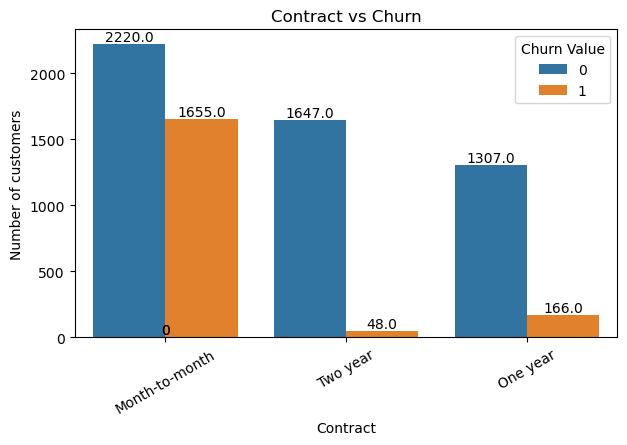

                Total Customers  Churned Customers Churn Rate
Contract                                                     
Month-to-month             3875               1655     42.71%
One year                   1473                166     11.27%
Two year                   1695                 48      2.83%


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example: Contract vs Churn
col = "Contract"

plt.figure(figsize=(7,4))
ax = sns.countplot(x=col, hue="Churn Value", data=eda,
                   order=eda[col].value_counts().index)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title(f"{col} vs Churn")
plt.xlabel(col)
plt.ylabel("Number of customers")
plt.xticks(rotation=30)
plt.show()

# Numeric summary (counts + churn rate)
summary = (
    eda.groupby(col)["Churn Value"]
    .agg(['count','sum','mean'])
    .rename(columns={'count':'Total Customers','sum':'Churned Customers','mean':'Churn Rate'})
)
summary["Churn Rate"] = (summary["Churn Rate"]*100).round(2).astype(str) + "%"
print(summary)

## **Insight**
### **1. Month-to-month contrats are te riskiest**
- Almost 43% of customers on month-to-month contracts churn.
- This is 4x higher than one-year contracts and 15x higher than two-year contracts.
### **2. Longer contracts reduce churn drastically**
- One-year contracts: churn rate drops to ~11%.
- Two-year contracts: churn rate is extremely low (~3%).
- This shows that long-term commitments create customer stickines
### **3. Actionable Insights**
- Customers on short-term (month-to-month) plans are the most vulnerable group.
- Company should target these customers with retention strategies:
- Offer discounts or incentives to switch to annual/two-year plans.
- Provide loyalty rewards for long-term commitment.
- By converting even a fraction of month-to-month customers into longer contracts, the company can significantly reduce csight mile?
s.




## **Payment Method vs Churn**

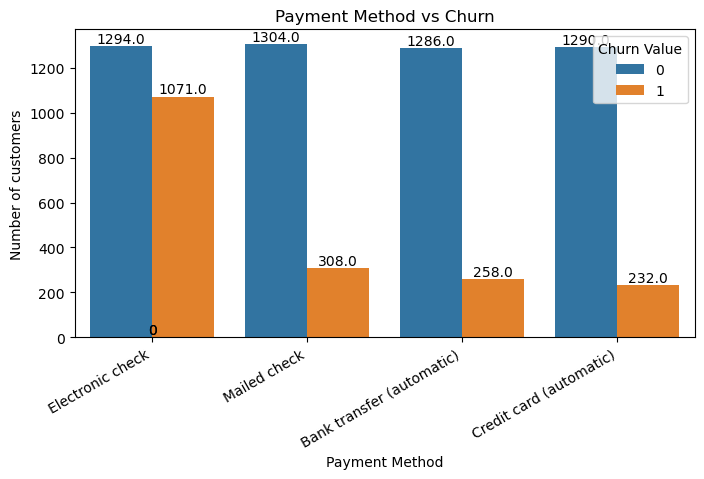

                           Total Customers  Churned Customers Churn Rate
Payment Method                                                          
Bank transfer (automatic)             1544                258     16.71%
Credit card (automatic)               1522                232     15.24%
Electronic check                      2365               1071     45.29%
Mailed check                          1612                308     19.11%


In [36]:
col = "Payment Method"

plt.figure(figsize=(8,4))
ax = sns.countplot(x=col, hue="Churn Value", data=eda,
                   order=eda[col].value_counts().index)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title(f"{col} vs Churn")
plt.xlabel(col)
plt.ylabel("Number of customers")
plt.xticks(rotation=30, ha="right")
plt.show()

# Numeric summary (counts + churn rate)
summary = (
    eda.groupby(col)["Churn Value"]
    .agg(['count','sum','mean'])
    .rename(columns={'count':'Total Customers','sum':'Churned Customers','mean':'Churn Rate'})
)
summary["Churn Rate"] = (summary["Churn Rate"]*100).round(2).astype(str) + "%"
print(summary)

## **Insights**


### **Electronic check customers churn the most**
- Nearly 45% churn rate, which is much higher than other payment methods.
- This suggests that customers paying by electronic check are less loyal or more dissatisfied.

 
### **Automatic payments reduce churn**
- Bank transfer (automatic) and Credit card (automatic) have the lowest churn rates (~15–17%).
-Automatic payments create convenience and reduce friction, making customers less likely to   leave.


### **Mailed check is in the middle**
- Churn rate is ~19%, lower than electronic check but higher than auto-pay methods.


 ### **Actionable Insights**
- High-risk group: Customers using Electronic check → company should investigate why this group is unhappy (maybe fees, convenience, or demographic factors).
- Retention strategy: Encourage customers to switch to automatic payment methods by offering discounts or rewards.
- This could directly reduce churn by making payments seamless and reducing drop-offs.


## **Churn Reason Analysis**

C:\Users\91945\AppData\Local\Temp\ipykernel_9908\168870828.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons.values, y=top_reasons.index, orient="h", palette="Set2")


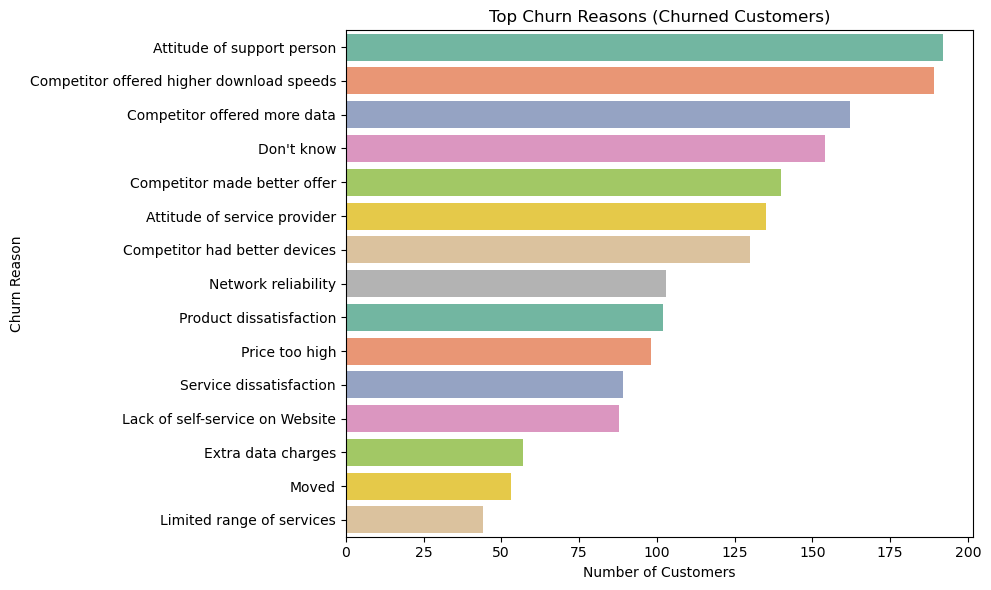

Top churn reasons (counts):

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Name: count, dtype: int64


In [37]:
col = "Churn Reason"

churned = eda[eda["Churn Value"] == 1]

# Top 15 churn reasons
top_reasons = churned[col].value_counts().head(15)

# Horizontal barplot
plt.figure(figsize=(10,6))
sns.barplot(x=top_reasons.values, y=top_reasons.index, orient="h", palette="Set2")
plt.title("Top Churn Reasons (Churned Customers)")
plt.xlabel("Number of Customers")
plt.ylabel("Churn Reason")
plt.tight_layout()
plt.show()

print("Top churn reasons (counts):\n")
print(top_reasons)

## **Insights**

### 1. Customer Support Issues are a Major Driver
- Attitude of support person (192) and Attitude of service provider (135) are among the top reasons.
- This shows that customer experience with support staff plays a huge role in churn.
### 2. Competitor Advantage is Strong
- Many customers left due to competitors offering better download speeds (189), more data (162), or better devices (130).
- Competitor made better offer (140) also highlights pricing and promotional pressure.
### 3. Service Quality & Reliability
- Network reliability (103) and Product dissatisfaction (102) are significant churn drivers.
- Customers expect consistent service quality, and failures here push them to competitors.
### 4.  Pricing & Charges- Price too high (98) and Extra data charges (57) indicate that cost sensitivity is another churn factor.
### 5. Digital Experience Gaps
- Lack of self-service on Website (88) shows that customers value easy online account management.







## **Business Implications**
- **Improve Customer Support**:
-  Train support staff, monitor service quality, and introduce empathy-driven customer service programs.
- **Competitive Benchmarking**:
-  Regularly compare pricing, speed, and device offerings with competitors to stay attractive.
- **Service Reliability**:
-  Invest in network infrastructure and product quality to reduce dissatisfaction.
- **Pricing Strategy**:
-  Consider flexible plans, loyalty discounts, or bundled offers to address "price too high" churners.
- **Digital Self-Service**:
-  Enhance website and app features for billing, troubleshooting, and plan management.

## **Spending Patterns vs Churn**

C:\Users\91945\AppData\Local\Temp\ipykernel_9908\3297133540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn Value", y=col, data=eda, palette="Set2")


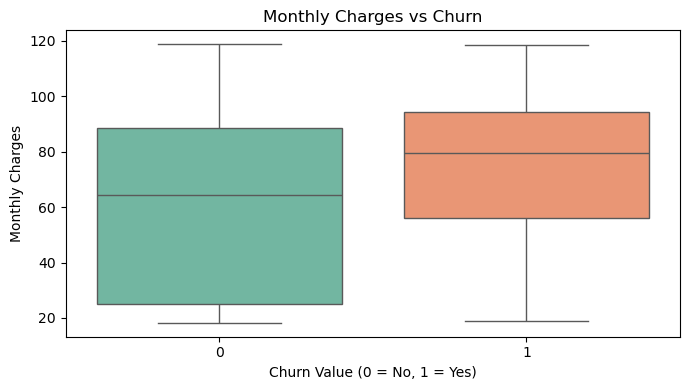

C:\Users\91945\AppData\Local\Temp\ipykernel_9908\3297133540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn Value", y=col, data=eda, palette="Set2")


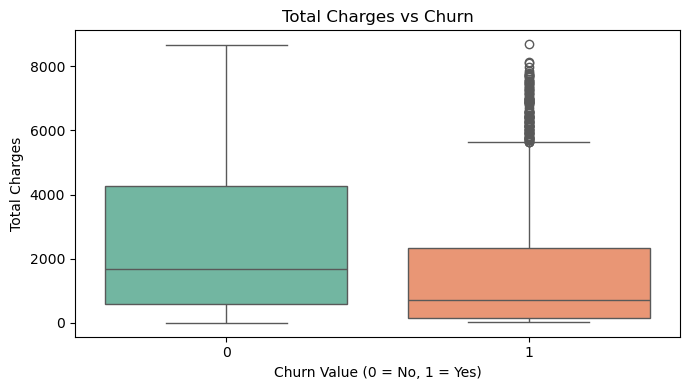

C:\Users\91945\AppData\Local\Temp\ipykernel_9908\3297133540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn Value", y=col, data=eda, palette="Set2")


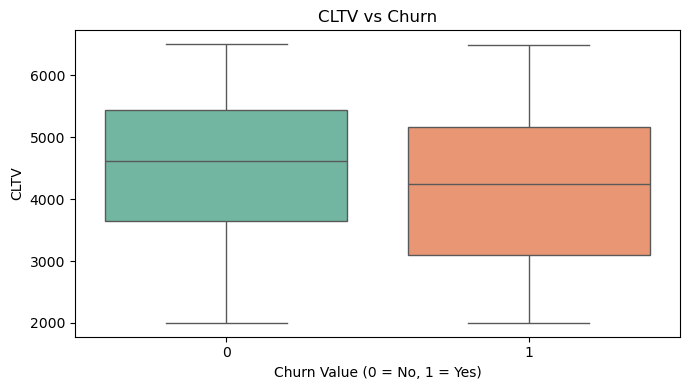


Average spending by churn group:

             Monthly Charges  Total Charges     CLTV
Churn Value                                         
No Churn               61.27        2549.91  4490.92
Churn                  74.44        1531.80  4149.41


In [38]:
# Spending Patterns vs Churn

num_cols = ["Monthly Charges", "Total Charges", "CLTV"]

# Boxplots for each numeric feature vs churn
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x="Churn Value", y=col, data=eda, palette="Set2")
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn Value (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Group averages
spend_summary = (
    eda.groupby("Churn Value")[num_cols]
    .mean()
    .rename(index={0: "No Churn", 1: "Churn"})
)
print("\nAverage spending by churn group:\n")
print(spend_summary.round(2))

## **Insights**
- **Monthly Charges**
 Churned customers pay higher monthly charges (74.44) compared to non-churners (61.27).
 This suggests that high monthly bills may be a churn trigger.
- **Total Charges**
 Non-churned customers have much higher total charges (2549.91 vs 1531.80).
 This indicates that retained customers stay longer and contribute more revenue over time.
- **Customer Lifetime Value (CLTV)**
 CLTV is higher for non-churners (4490.92 vs 4149.41).
 Churned customers leave earlier, reducing their lifetime value despite paying more per month.

## **Business Implications**
- **High-bill customers are at risk:** Company should design discounts, flexible plans, or loyalty offers for customers with high monthly charges.
- **Retention drives revenue:** Customers who stay longer generate much higher total revenue and CLTV, even if their monthly charges are lower.
- **Targeted retention:** Focus retention efforts on high-paying churn-risk customers, since losing them has a bigger revenue impact.

---------------------------
## **Revenue Impact of Churn**

In [39]:
# Monthly revenue contribution by churn group
revenue_summary = (
    eda.groupby("Churn Value")["Monthly Charges"]
    .sum()
    .rename(index={0: "No Churn", 1: "Churn"})
)

print("Monthly Revenue Contribution:\n")
print(revenue_summary.round(2))

# Average monthly revenue per customer in each group
avg_revenue = (
    eda.groupby("Churn Value")["Monthly Charges"]
    .mean()
    .rename(index={0: "No Churn", 1: "Churn"})
)

print("\nAverage Monthly Revenue per Customer:\n")
print(avg_revenue.round(2))


Monthly Revenue Contribution:

Churn Value
No Churn    316985.75
Churn       139130.85
Name: Monthly Charges, dtype: float64

Average Monthly Revenue per Customer:

Churn Value
No Churn    61.27
Churn       74.44
Name: Monthly Charges, dtype: float64


## **Insights**
**High-value customers are leaving**
- Churned customers pay more per month on average (74.44) compared to non-churners (61.27).
- This means the company is losing its higher-paying segment.
 
**Revenue loss is significant**
- Even though churned customers are fewer, their aggregate monthly contribution (139k) is huge.
- Losing them directly impacts recurring revenue.
  
**Stable revenue from loyal customers**
- Non-churners contribute 316k monthly, which is more than double churners.
- This shows that long-term retention is the backbone of revenue stability

## **Business Implications**
- **Retention focus on high-paying churners:** These customers are more valuable per head, so losing them is costlier.
- **Revenue protection strategy:** Introduce loyalty discounts, personalized offers, or premium support for high-bill customers at risk.
- **Upsell stable customers:**  Non-churners pay less per month → upselling them to higher plans can balance revenue without increasing churn risk.



_____________________________________________________________________________________

## **Tenure vs Churn**

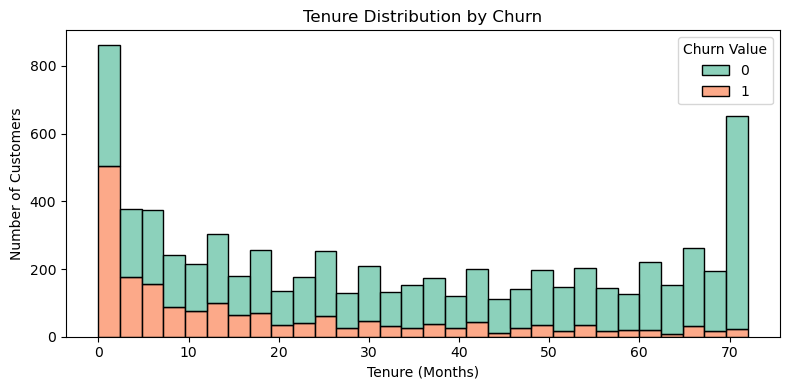


Tenure Summary by Churn Group:

             count   mean  median
Churn Value                      
No Churn      5174  37.57    38.0
Churn         1869  17.98    10.0


In [40]:
plt.figure(figsize=(8,4))
sns.histplot(data=eda, x="Tenure Months", hue="Churn Value", bins=30, kde=False, multiple="stack", palette="Set2")
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

# Numeric summary: average tenure by churn group
tenure_summary = (
    eda.groupby("Churn Value")["Tenure Months"]
    .agg(['count','mean','median'])
    .rename(index={0: "No Churn", 1: "Churn"})
)

print("\nTenure Summary by Churn Group:\n")
print(tenure_summary.round(2))


### **Insights**
- **Short-tenure customers churn more**
    
- Churned customers have average tenure ~18 months, while non-churners stay ~38 months.
- Median tenure for churners is just 10 months, showing many leave within the first year.

- **Long-tenure customers are loyal**
    
- Customers who stay beyond 2–3 years are much less likely to churn.
- This suggests that once customers cross a certain “loyalty threshold,” they are more stable.

- **Business risk window**
    
- The first 12 months are the most critical for churn prevention.
- If the company can retain customers beyond this period, churn probability drops significantly.

    
### **Business Implications**
- **Onboarding focus:** Improve the first-year experience with better support, offers, and engagement.
- **Early warning system:** Track customers in their first 12 months closely and flag churn risk.
- **Loyalty programs:** Reward long-tenure customers to keep them engaged and prevent late-stage churn.



-------------------------------------------
## **Services vs Churn**





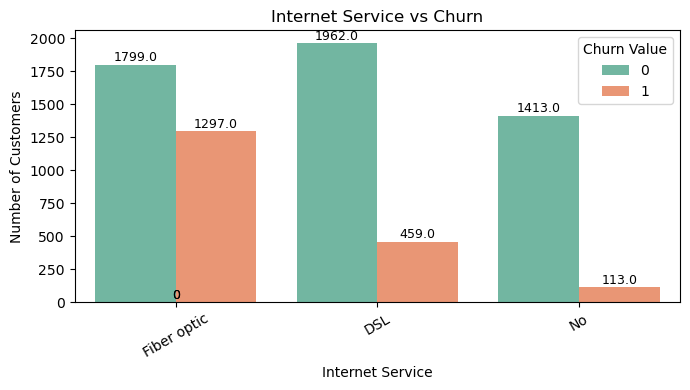


Internet Service vs Churn Summary:

                  Total Customers  Churned Customers Churn Rate
Internet Service                                               
DSL                          2421                459     18.96%
Fiber optic                  3096               1297     41.89%
No                           1526                113       7.4%


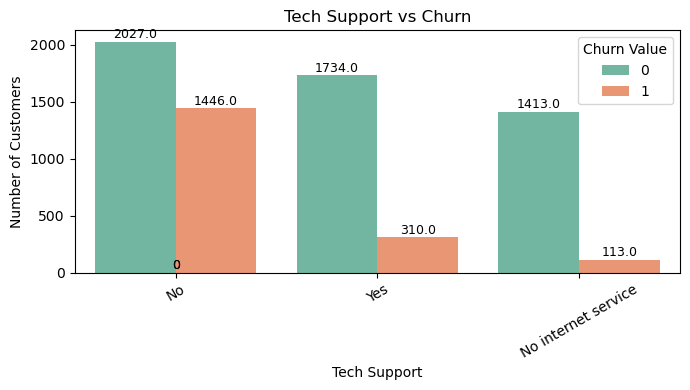


Tech Support vs Churn Summary:

                     Total Customers  Churned Customers Churn Rate
Tech Support                                                      
No                              3473               1446     41.64%
No internet service             1526                113       7.4%
Yes                             2044                310     15.17%


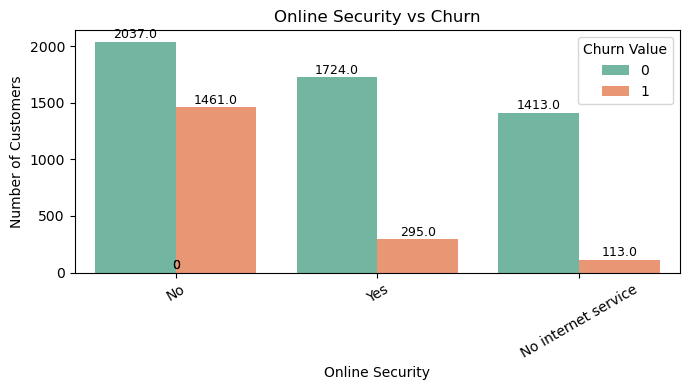


Online Security vs Churn Summary:

                     Total Customers  Churned Customers Churn Rate
Online Security                                                   
No                              3498               1461     41.77%
No internet service             1526                113       7.4%
Yes                             2019                295     14.61%


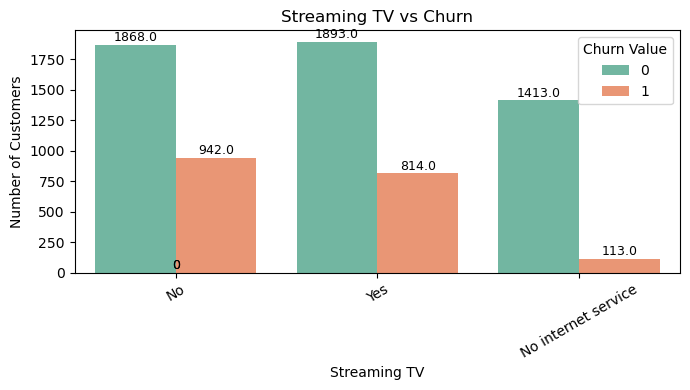


Streaming TV vs Churn Summary:

                     Total Customers  Churned Customers Churn Rate
Streaming TV                                                      
No                              2810                942     33.52%
No internet service             1526                113       7.4%
Yes                             2707                814     30.07%


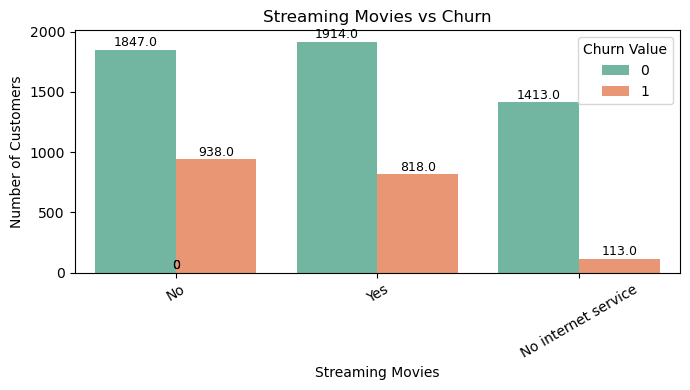


Streaming Movies vs Churn Summary:

                     Total Customers  Churned Customers Churn Rate
Streaming Movies                                                  
No                              2785                938     33.68%
No internet service             1526                113       7.4%
Yes                             2732                818     29.94%


In [43]:
service_cols = ["Internet Service", "Tech Support", "Online Security", "Streaming TV", "Streaming Movies"]

for col in service_cols:
    plt.figure(figsize=(7,4))
    ax = sns.countplot(x=col, hue="Churn Value", data=eda,
                       order=eda[col].value_counts().index, palette="Set2")

    # Add counts on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Number of Customers")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

    # Numeric summary
    summary = (
        eda.groupby(col)["Churn Value"]
        .agg(['count','sum','mean'])
        .rename(columns={'count':'Total Customers','sum':'Churned Customers','mean':'Churn Rate'})
    )
    summary["Churn Rate"] = (summary["Churn Rate"]*100).round(2).astype(str) + "%"
    print(f"\n{col} vs Churn Summary:\n")
    print(summary)


### **Insights**

- **High churn risk:** Fiber optic customers, and those without Tech Support or Online Security.
 
- **Retention levers:** Tech Support and Online Security significantly reduce churn.
 
- **Bundling helps:** Streaming services reduce churn moderately, but not as strongly as support/security.

### **Business Implications**
- **Investigate Fiber Optic churn:** Pricing, reliability, or competitor offers may be causing dissatisfaction.
  
- **Promote Tech Support & Online Security:** Bundle them with internet plans to reduce churn.

- **Encourage service bundling:** Customers with multiple services (TV, Movies, Security, Support) are stickier.


____________________________________________________________________________________________________________________

 # **Customer Churn Analysis Report**
1. Churn Distribution
- About 26% of customers churn.
- That means 1 in 4 customers is leaving the company.
Business Suggestion:
Immediate retention strategies are needed to reduce churn.

2. Contract Type vs Churn
- Month-to-month contracts → 42% churn
- One-year contracts → 11% churn
- Two-year contracts → 3% churn
Business Suggestion:
Promote long-term contracts with discounts and loyalty offers.

3. Payment Method vs Churn
- Electronic check → 45% churn
- Auto-pay methods (Bank transfer, Credit card) → 15–17% churn
Business Suggestion:
Encourage customers to switch to auto-pay methods with incentives.

4. Churn Reasons
- Top reasons: Poor support attitude, Competitor offers (better speed, data, devices), Network reliability, High price, Extra charges.
Business Suggestion:
Improve customer support, benchmark against competitors, enhance network reliability, and provide flexible pricing.

5. Spending Patterns
- Churned customers → Higher monthly charges (74) but lower lifetime value.
- Non-churned customers → Lower monthly charges (61) but higher lifetime value.
Business Suggestion:
High-bill customers are at risk → offer loyalty discounts and flexible plans.

6. Revenue Impact
- Non-churn customers contribute ~317k monthly revenue.
- Churned customers represent ~139k monthly revenue loss.
- Churned customers pay more per head (74 vs 61).
Business Suggestion:
Prioritize retention of high-paying churners. Upsell stable customers to balance revenue.

7. Tenure vs Churn
- Churned customers average tenure = 18 months.
- Non-churned customers average tenure = 38 months.
- Most churn happens in the first 12 months.
Business Suggestion:
Focus on onboarding and first-year experience. Build early warning systems for short-tenure customers.

8. Services vs Churn
- Fiber optic customers churn the most (42%).
- Customers without Tech Support or Online Security churn ~42%.
- Customers with these services churn only ~15%.
- Streaming services reduce churn slightly (~30% vs 34%).
Business Suggestion:
Bundle Tech Support and Online Security with internet plans. Investigate fiber optic dissatisfaction. Promote multi-service bundles.


_______________________________________________________________________________________________
 ## Overall Conclusion
- **Biggest churn drivers:** Short contracts, Electronic check payments, Poor support, Competitor advantage, High bills, Lack of support/security services.
  
- **Retention strategy:** Promote long-term contracts, encourage auto-pay, improve support and reliability, protect high-bill customers, and bundle services.


_________________________________________________________________________________________________________________________
## **📈 Scenario Analysis: Churn Reduction → Revenue Growth**

Baseline:
- Current churn rate = 26%
- Current monthly revenue = 456k (317k from non-churners + 139k from churners)

| Scenario   | Churn Rate | Revenue Saved | New Monthly Revenue | Growth vs Baseline |
|------------|------------|---------------|---------------------|--------------------|
| Baseline   | 26%        | –             | 456k                | –                  |
| Moderate   | 20%        | +27k          | 483k                | +6%                |
| Strong     | 15%        | +55k          | 511k                | +12%               |
| Aggressive | 10%        | +83k          | 539k                | +18%               |

### **Interpretation**
- Reducing churn from 26% → 20% could save 27k per month (~324k per year).
- Reducing churn to 15% could save 55k per month (~660k per year).
- If churn drops to 10%, the company could gain 83k per month (~1M per year).



### **In short:** 
Every percentage point reduction in churn directly translates into significant revenue growth
___________________________________________________________________________